In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Parameter Initialization

In [2]:
# Total population, N.
N = 93000

# Initial number of infected and recovered individuals, I0_a and R0.
I0, R0, E0, D0 = 1, 0, 0, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - E0 - D0

# Parameterss
beta = 0.3      # contact rate
gamma = 0.1 # mean recovery rate(gamma) (in 1/days)
sigma =  0.1  # incubation rate(sigma)
p_d = 0.05    #fatality rate

# A grid of time points (in days)
t = np.linspace(0, 300, 300)

### The SEIRD model differential equations

In [3]:

def deriv(y, t, N, beta, gamma, sigma, p_d):
    S, E, I, R , D = y
    
    # Susceptible
    dSdt = -beta * S * I / N 
    
    # Exposed
    dEdt = beta * S * I / N - sigma*E 
    
    # Infected
    dIdt = sigma*E - gamma * I
    
    # Recovered
    dRdt = (1-p_d) * gamma * I
    
    # Diseased
    dDdt = p_d * gamma * I 
    
    return dSdt, dEdt, dIdt, dRdt, dDdt

### Integration

In [4]:
# Initial conditions vector
y0 = S0, E0, I0, R0, D0

# Integrate the SIERD equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, sigma, p_d))
S, E, I, R, D = ret.T

### Plotting

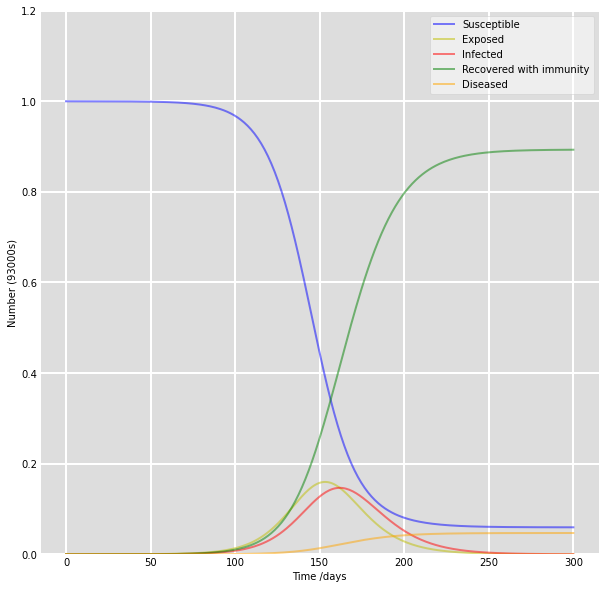

In [5]:
# Plot the data on five separate curves for S(t), E(t), I(t), R(t), D(t)
fig = plt.figure(facecolor='w',figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/N, 'orange', alpha=0.5, lw=2, label='Diseased')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number ('+str(N)+'s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()